In [1]:
#-*- encoding: utf-8 -*-

import os
import numpy as np
import imp
from utils.utils import rescale

import dataset
imp.reload(dataset)
from dataset import MNIST, Feature

import model
imp.reload(model)   # 不这样reload，调试的时候修改引用的py文件是没有作用的
from model import Net_1, Net_2, LossFunc, Optim


In [2]:
# network parameters
input_size = 100
layer1_node = 20
layer2_node = 50
batch_size = 1000
output_size = 1

T = [0.1, 0.05, 0.05, 0.05, 0.02]
epochs = [20, 20, 30, 40, 50]
search_step = [220, 100, 40, 20, 10]


In [3]:
############### data pre-processing ###############

train_set = MNIST('mnist', 'train', (10, 10))
test_set = MNIST('mnist', 't10k', (10, 10))

'''10 class
train_feature = Feature(train_set.data, kernel_size=(4,4), stride=(3,3))
train_fv = train_feature._data['images'].reshape(-1, 100)         # 10 class, 100 input
rescale(train_fv, 30, 250, False)
train_label = train_feature._data['labels']
input_train_data = train_feature.cut_into_batch(batch_size=1000, vector=train_fv, labels=train_label)

test_feature = Feature(test_set.data, kernel_size=(4,4), stride=(3,3))
test_fv = test_feature._data['images'].reshape(-1, 100)           # 10 class, 100 input
rescale(test_fv, 30, 250, False)
test_label = test_feature._data['labels']
input_test_data = test_feature.cut_into_batch(batch_size=1000, vector=test_fv, labels=test_label)
'''

train_feature = Feature(train_set.data, kernel_size=(4,4), stride=(3,3))
train_fv, train_label = train_feature.extract_num_class(0, 1)
# print(train_fv.shape)
# print(train_label.shape)
train_fv = train_fv.reshape(-1, 100)
rescale(train_fv, 30, 250, False)
input_train_data = train_feature.cut_into_batch(batch_size=1000, vector=train_fv, labels=train_label)

test_feature = Feature(test_set.data, kernel_size=(4,4), stride=(3,3))
test_fv, test_label = test_feature.extract_num_class(0, 1)
test_fv = test_fv.reshape(-1, 100)
rescale(test_fv, 30, 250, False)
input_test_data = test_feature.cut_into_batch(batch_size=1000, vector=test_fv, labels=test_label)


In [4]:
############### model define ###############

net = Net_1(input_size, layer1_node, output_size)
# net = Net_2(input_size, layer1_node, layer2_node, output_size)
loss = LossFunc()
optimizer = Optim(net)

In [5]:
import matplotlib.pyplot as plt

def draw(title):

    threshold = net.get_parameters()
    layer1_th = threshold[0]
    layer2_th = threshold[1]

    # print(layer1_th.shape)
    # print(layer2_th.shape)

    all_th = np.hstack((layer1_th.flatten(), layer2_th.flatten())).tolist()
    plt.hist(all_th)
    plt.title(title)
    plt.show()

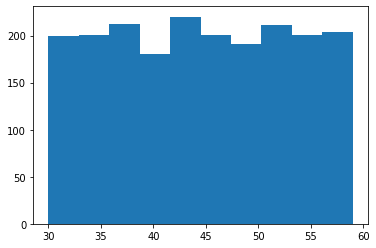

0.125


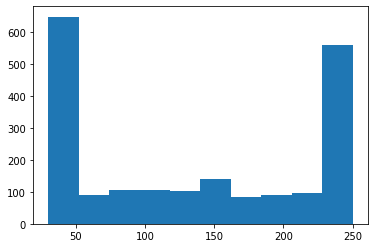

0.185
0.377
0.385
0.394
0.4
0.419


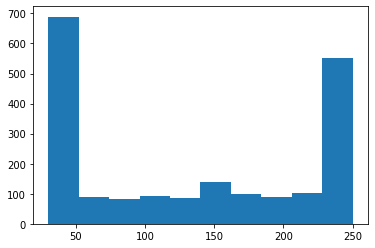

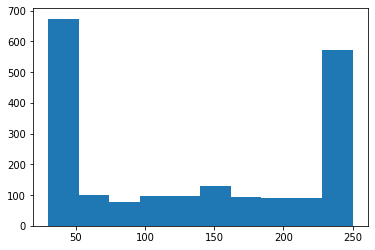

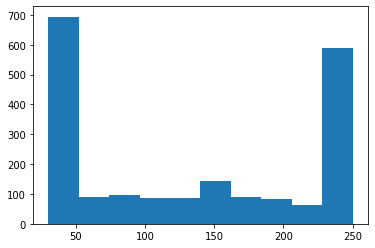

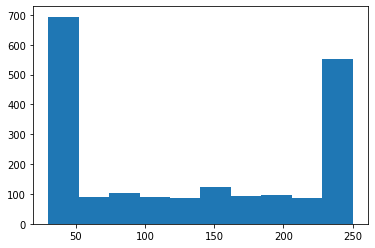

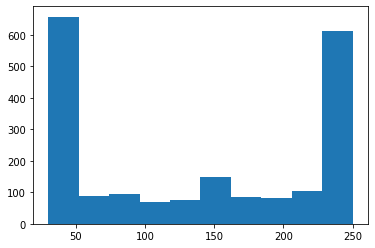

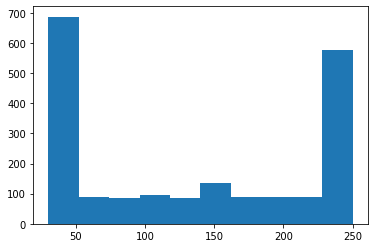

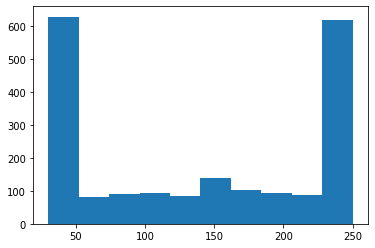

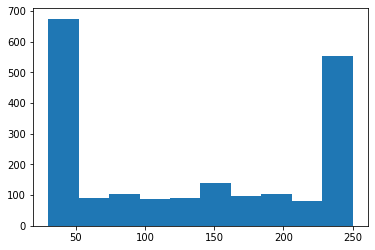

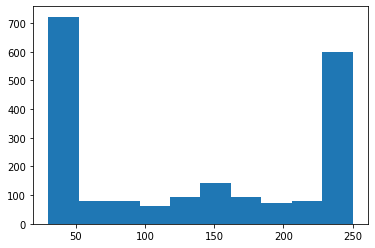

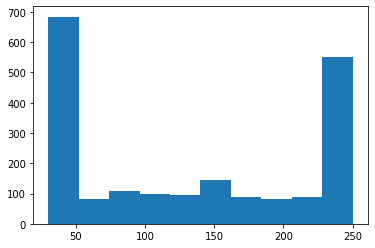

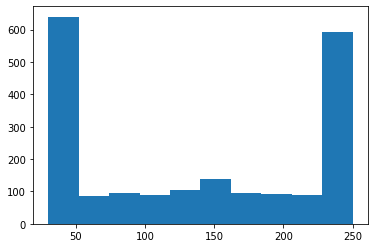

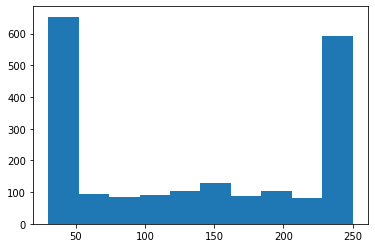

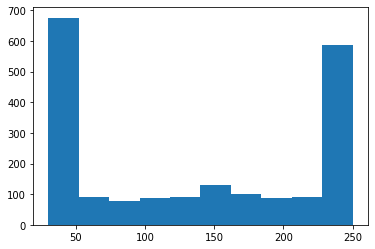

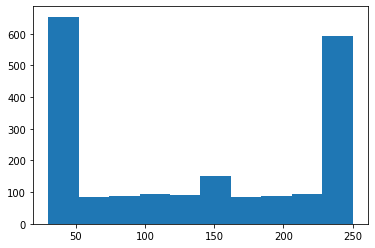

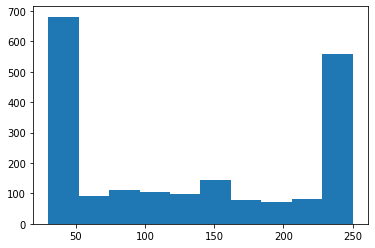

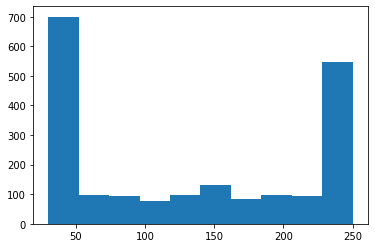

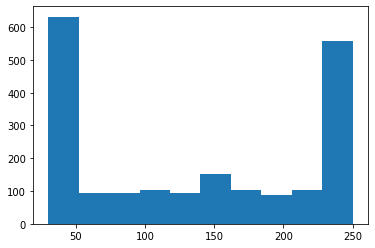

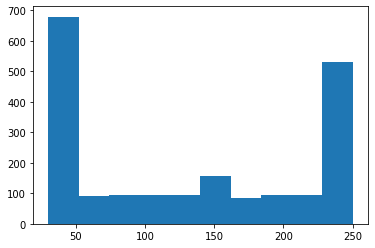

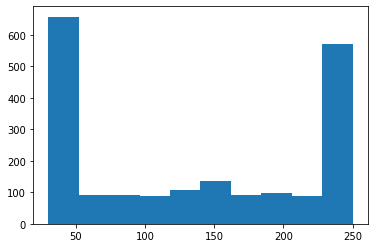

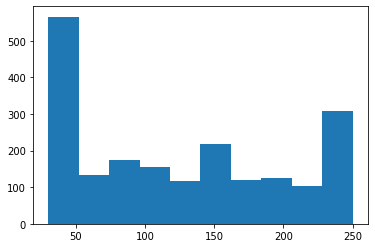

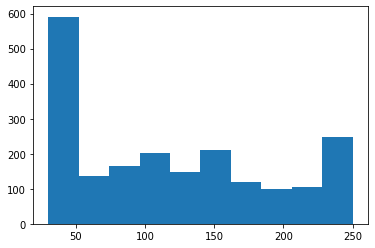

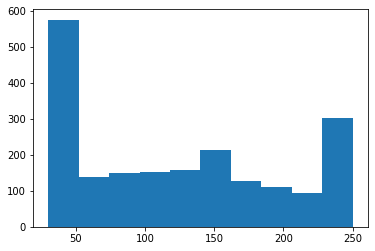

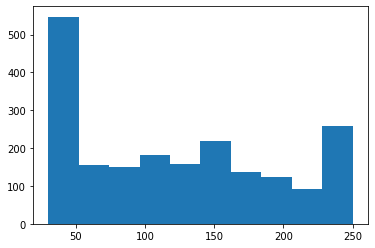

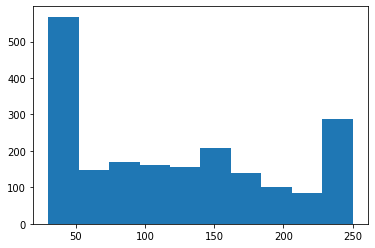

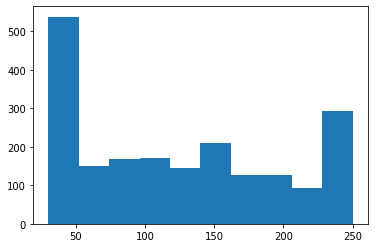

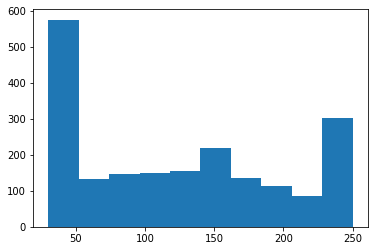

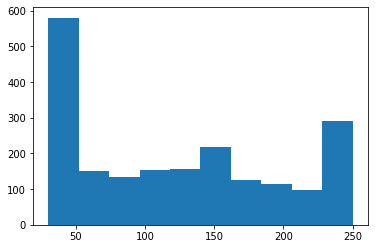

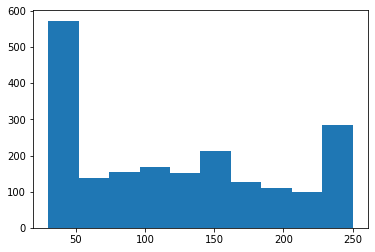

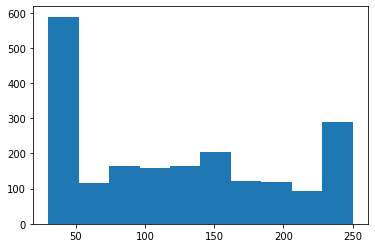

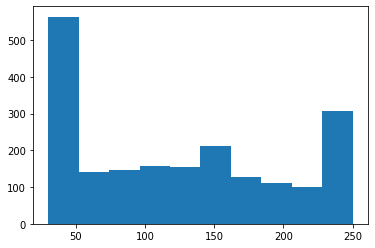

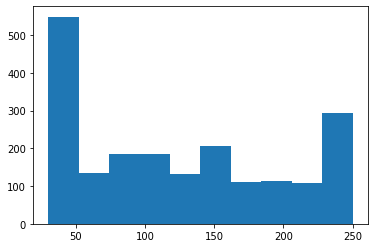

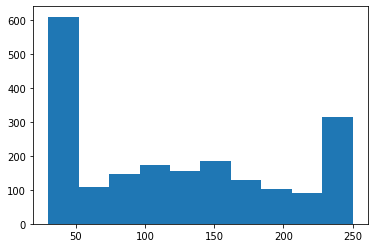

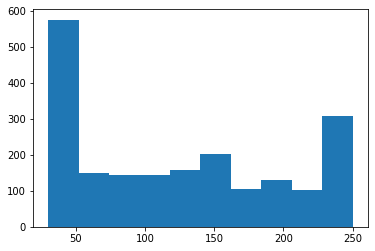

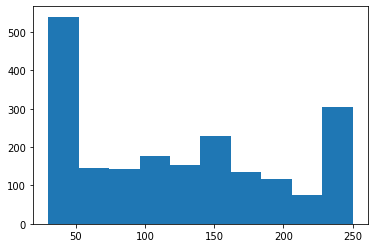

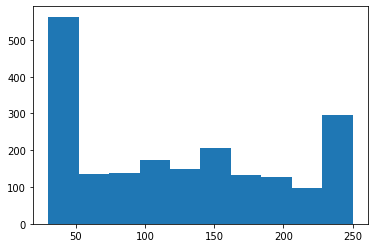

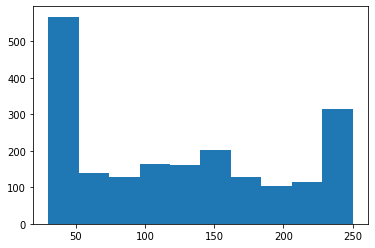

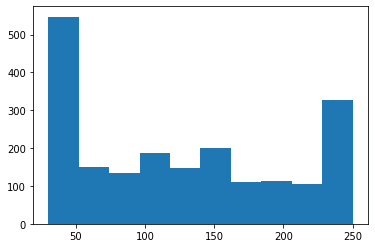

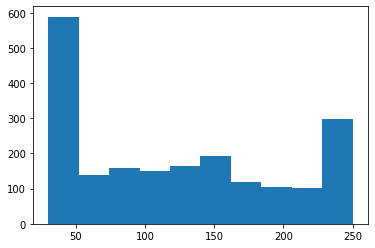

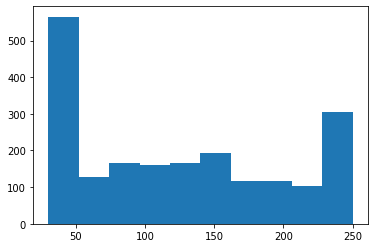

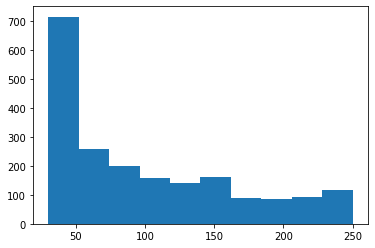

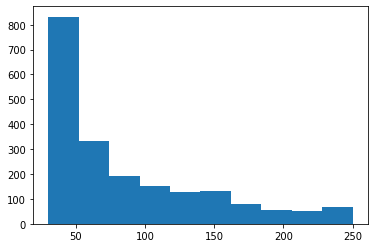

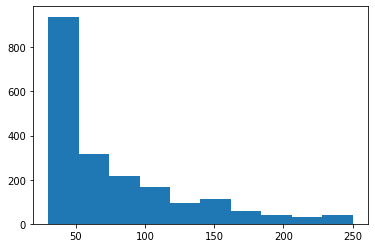

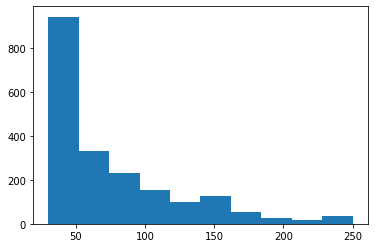

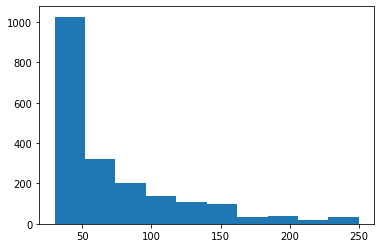

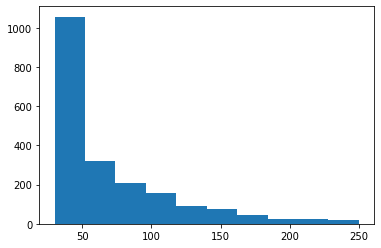

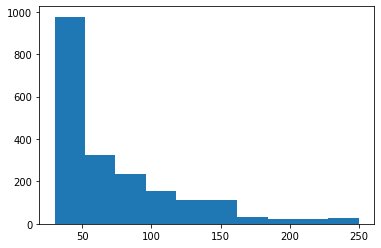

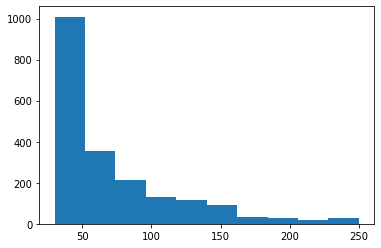

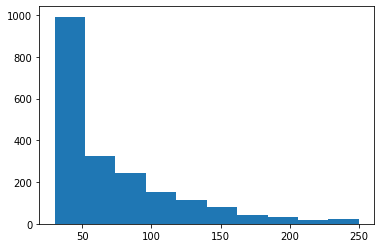

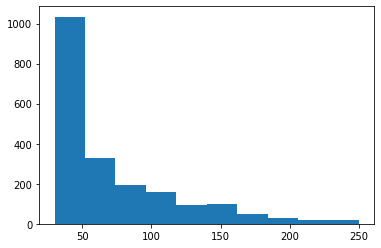

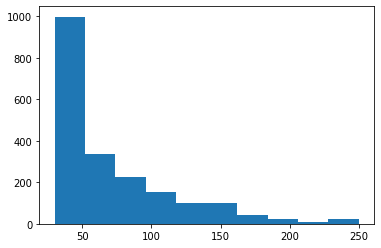

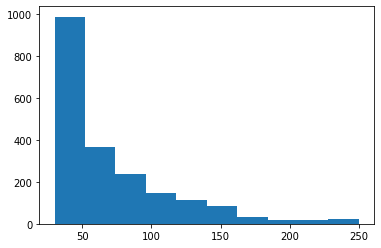

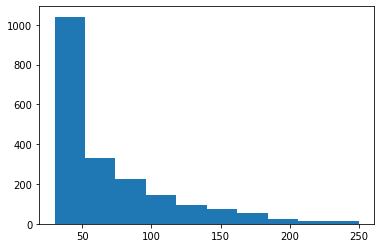

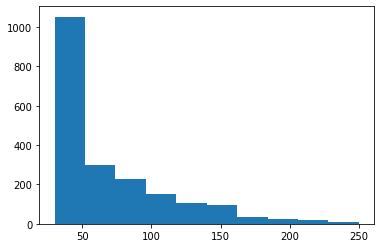

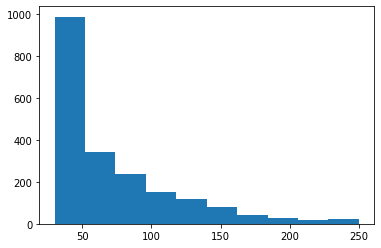

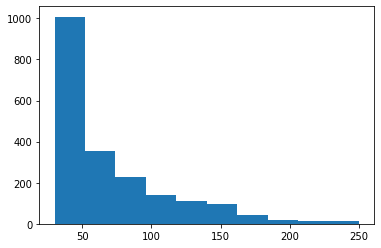

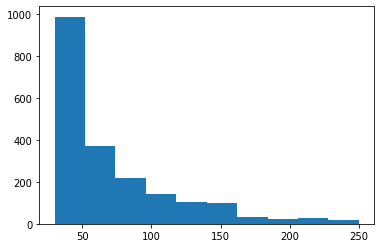

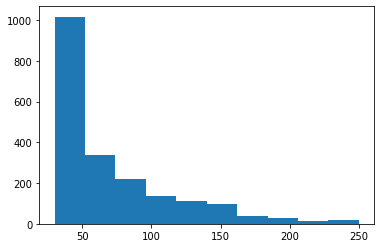

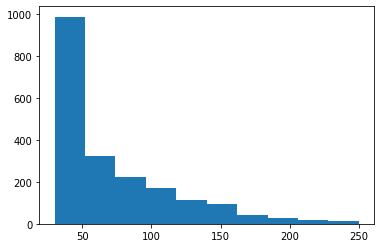

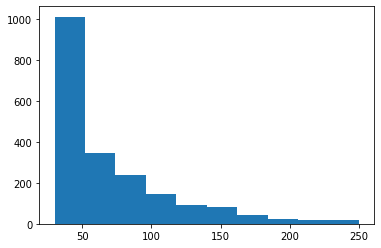

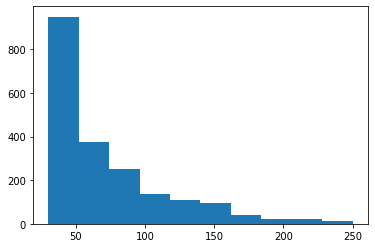

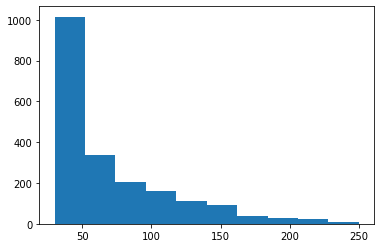

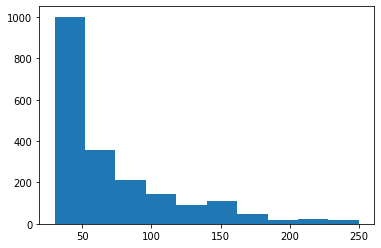

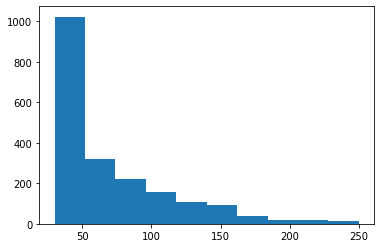

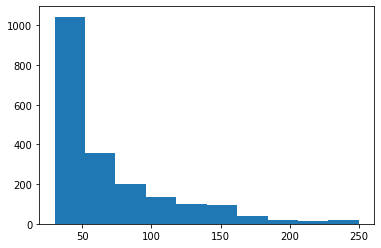

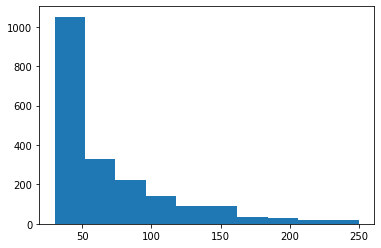

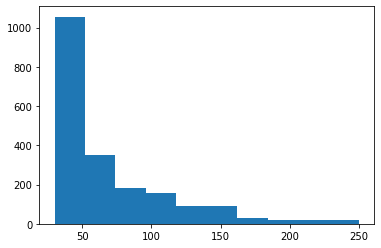

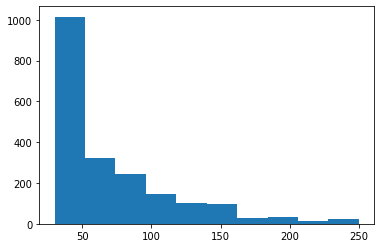

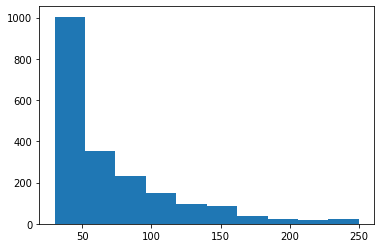

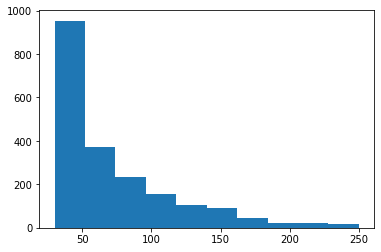

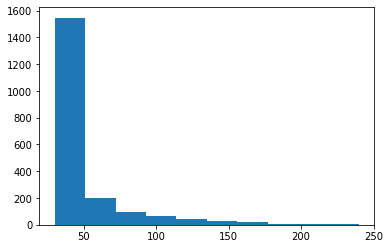

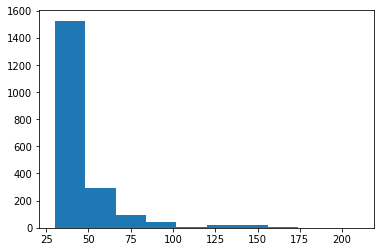

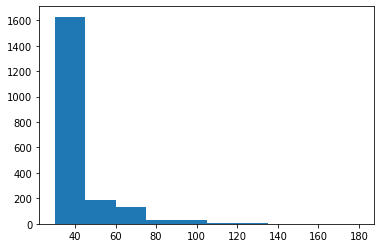

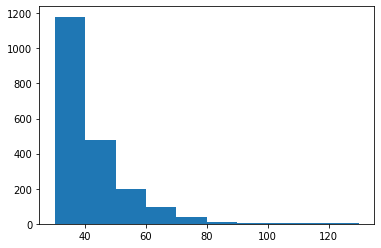

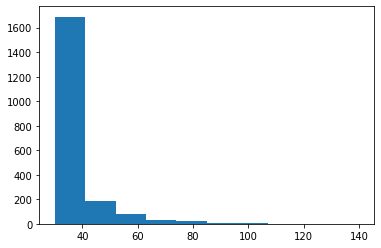

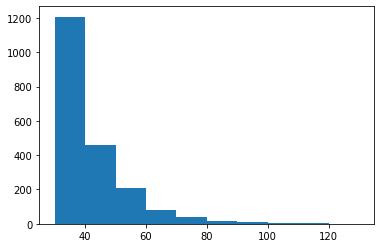

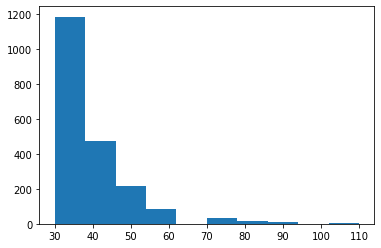

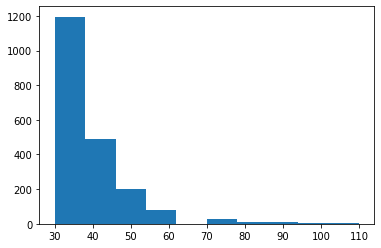

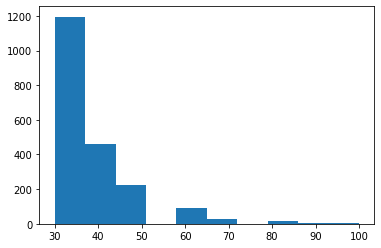

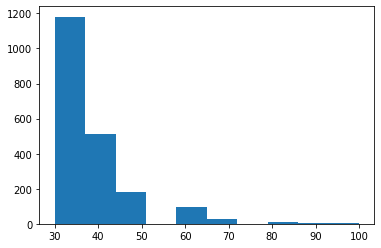

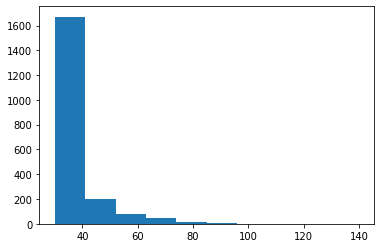

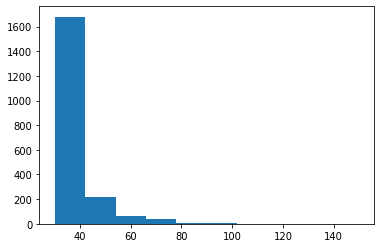

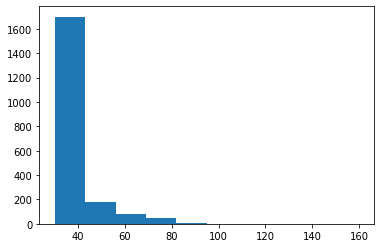

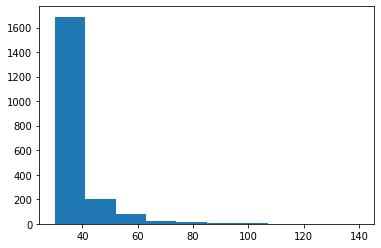

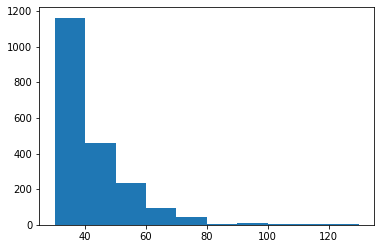

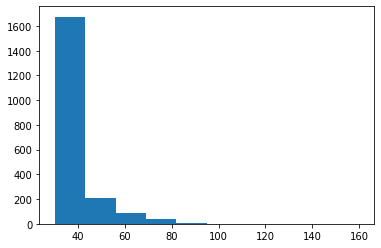

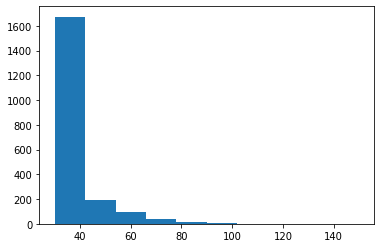

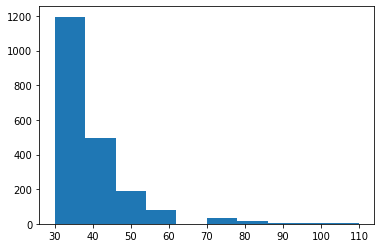

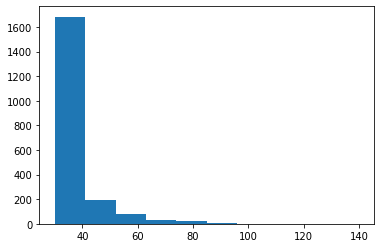

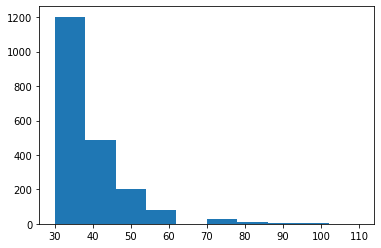

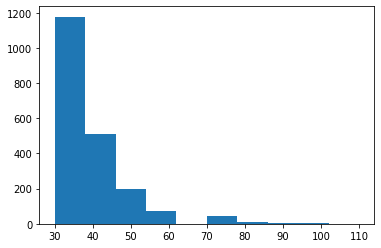

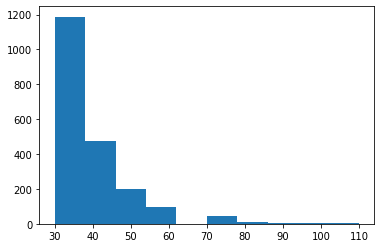

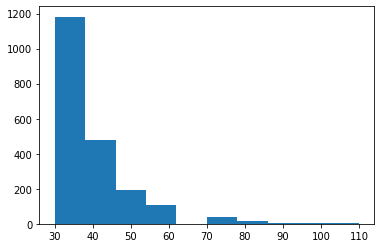

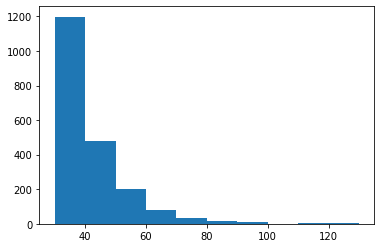

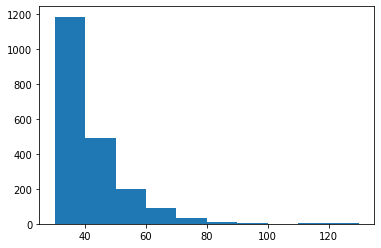

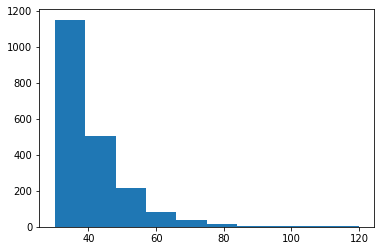

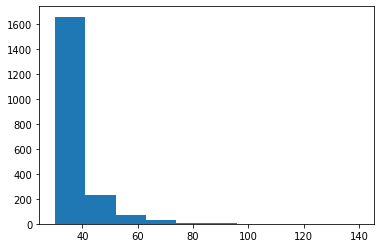

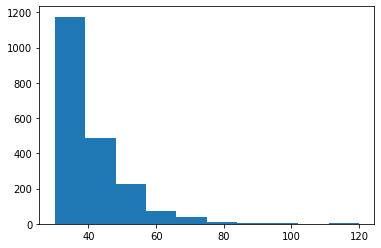

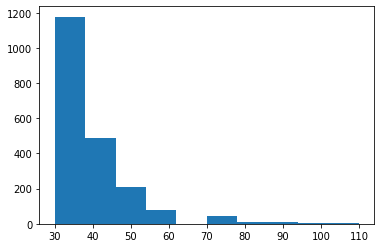

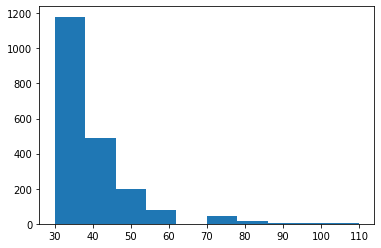

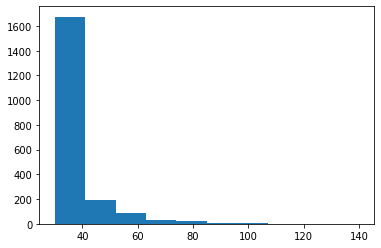

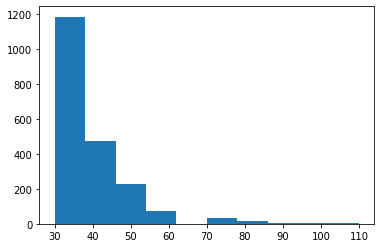

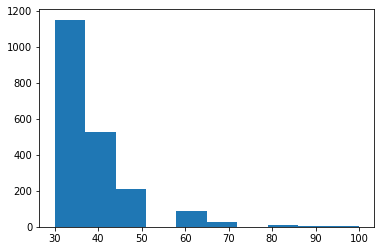

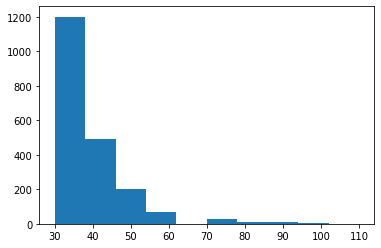

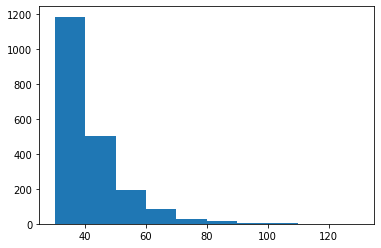

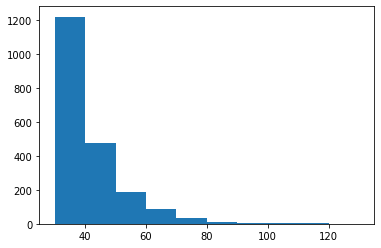

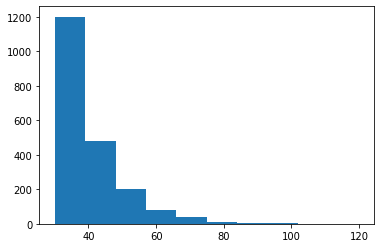

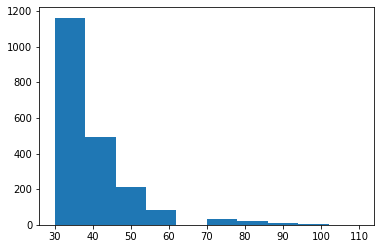

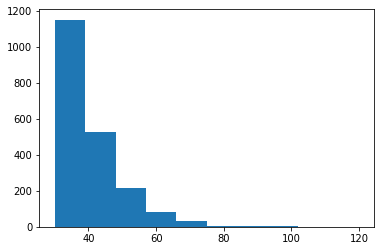

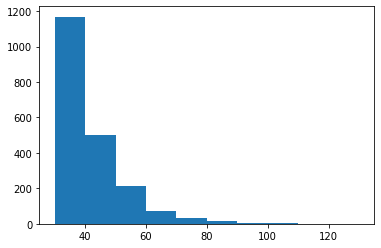

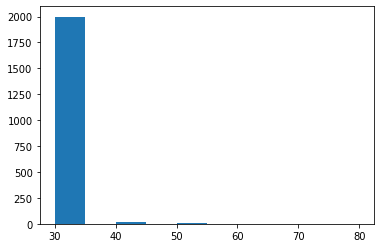

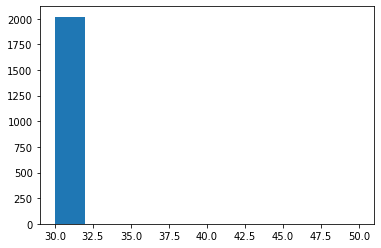

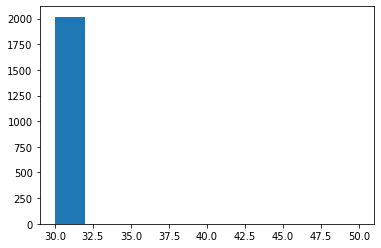

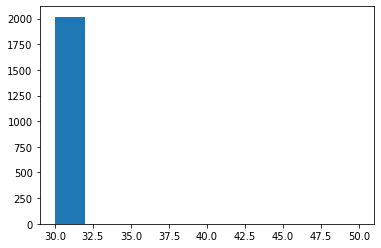

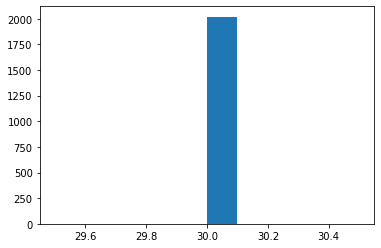

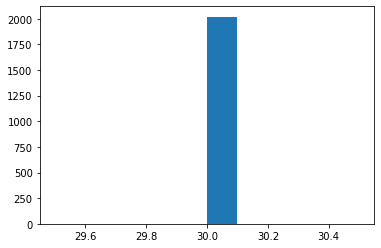

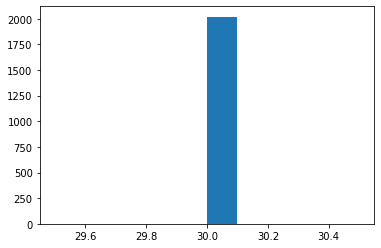

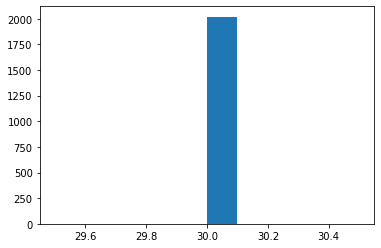

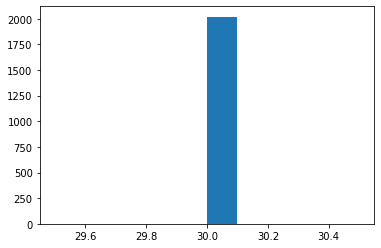

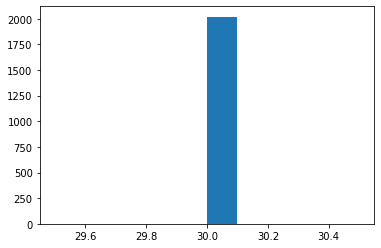

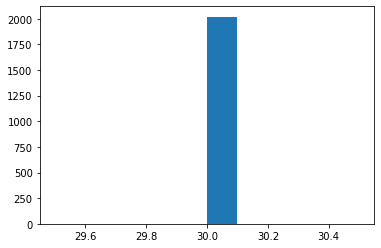

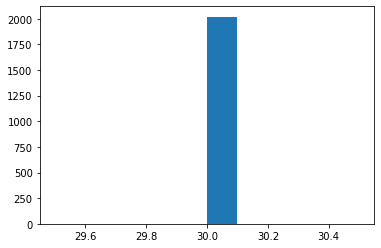

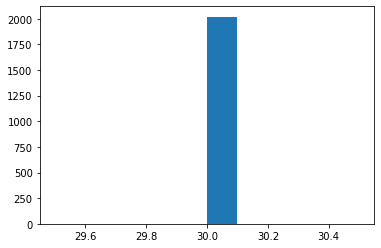

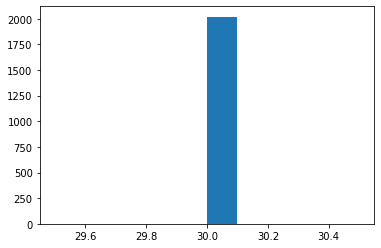

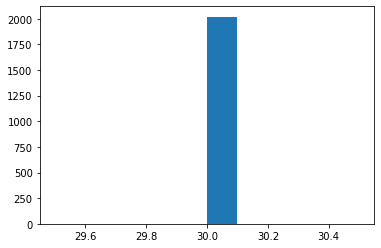

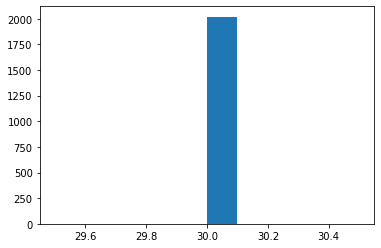

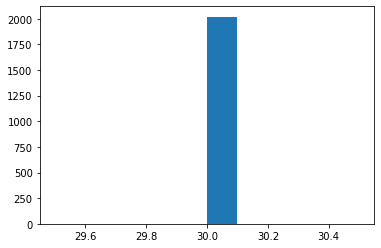

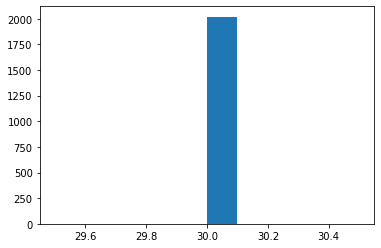

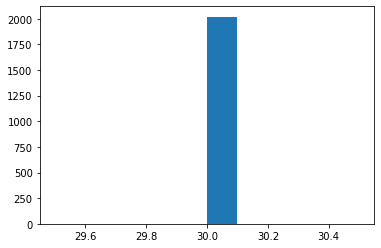

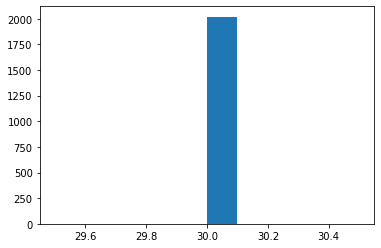

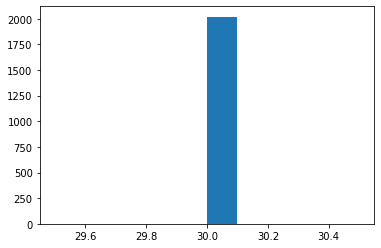

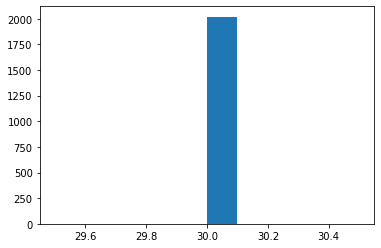

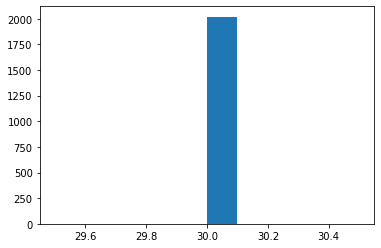

KeyboardInterrupt: 

In [6]:
############### train ###############

for index in range(len(epochs)):
    epoch = epochs[index]
    optimizer.search_step = search_step[index]
    optimizer.T = T[index]
    for _ in range(epoch):
        for i, (images, labels) in enumerate(input_train_data):
            outputs = net(images)
            # print(outputs[0])
            # print(outputs[1])
            # print(outputs[2])
            # print()
            # print(outputs.shape)    # shape=(batch_size, 1)
            acc = loss(outputs, labels)
            # print(acc)
            if i == 0:
                # print(acc)
                draw(search_step[index])
                # input('press to continue')
            optimizer.update(acc, outputs, labels)

In [ ]:
import matplotlib.pyplot as plt

a = [1,2,3,4,3,3,3]
plt.hist(a)
plt.show()

input('hahahah')

print('oh my zsh')